<a href="https://colab.research.google.com/github/yoon0309/machine-deep-study/blob/main/%ED%98%BC%EA%B3%B5%ED%95%99%EC%8A%B5%EB%8B%A8_2%EC%A3%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#필요한 라이브러리를 모두 불러보자
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error

In [2]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

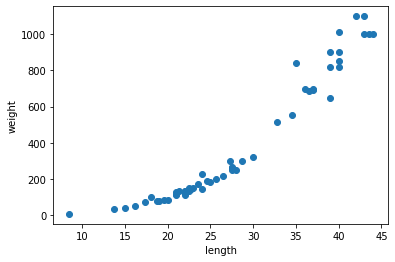

In [3]:
#데이터의 특성을 알아보기 위해서 scatter plot으로 확인해보기

plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

=> 농어의 길이가 커짐에 따라 무게가 늘어남을 확인할 수 있었습니다. 

In [4]:
#훈련세트와 테스트 세트로 나눠보자 
train_input, test_input, train_target, test_target =  train_test_split(
    perch_length, perch_weight, random_state=42
)

In [5]:
#특성 1개 사용하므로 수동으로 2차원 배열을 만들어 주어야 함 
test_array= np.array([1,2,3,4])
print(test_array.shape)

(4,)


In [6]:
#test_array는 (4,)배열임을 확인, (2,2)크기로 바꿔보기 
test_array= test_array.reshape(2,2)
print(test_array.shape)

(2, 2)


In [7]:
#reshape() 배열을 통해 train_input, test_input을 2차원 배열로 바꿔보기 
train_input= train_input.reshape(-1,1)
test_input=test_input.reshape(-1,1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


In [8]:
knr= KNeighborsRegressor()
#K-최근접 이웃 회귀 모델을 훈련 
knr.fit(train_input, train_target)

KNeighborsRegressor()

In [9]:
#테스트 세트의 점수를 확인 
print(knr.score(test_input, test_target))

0.992809406101064


In [10]:
#테스트 세트에 대한 예측 
test_prediction = knr.predict(test_input)

#테스트 세트에 대한 평균 절댓값 오차를 계산 
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


In [11]:
#앞에서 훈련한 모델을 사용해서 훈련세트의 결정계수를 구해보기 
print(knr.score(train_input, train_target))

0.9698823289099254


앞서 진행한 test_input, test_target의 결정계수 값이 0.99, 훈련한 모델 train_input, train_target이 0.96으로 과소적합되었음을 알 수 있다. 이 문제를 해결하기 위해서는 모델을 조금 복잡하게 만든다 

지금 현재 쓰고 있는 것은 k-최근접 이웃 알고리즘이기 때문에 이웃의 갯수를 줄이는 것이다 

In [12]:
#보통 이웃의 개수가 5이므로 3으로 줄여보자 
knr.n_neighbors= 3
#모델을 다시 훈련하기 
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

0.9804899950518966


In [13]:
#테스트 점수를 확인해보자 
print(knr.score(test_input, test_target))

0.9746459963987609


테스트 점수는 훈련 세트보다 낮아졌으므로 과소적합 문제를 해결함. 따라서 성공적으로 회귀 모델을 훈련했음 

--------------------------

03-2 선형 회귀

In [14]:
#필요한 라이브러리를 불러온다
import numpy as np

In [15]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [16]:
from sklearn.model_selection import train_test_split 

#훈련 세트와 테스트 세트로 나눔 
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42
)

In [17]:
#훈련 세트와 테스트 세트를 2차원 배열로 바꾼다 
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1,1)

In [18]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)

#K-최근접 이웃 회귀 모델을 훈련함 
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [19]:
#길이가 50cm인 농어의 무게를 예측 
print(knr.predict([[50]]))

[1033.33333333]


=> 농어의 무게가 실제보다 더 훨씬 많이 나감

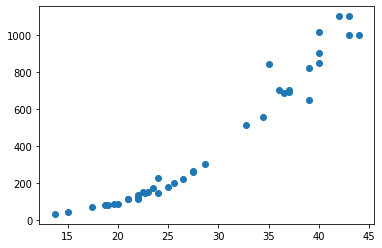

In [20]:
import matplotlib.pyplot as plt 

#50cm  농어의 이웃을 구함
distances, indexes = knr.kneighbors([[50]])

#훈련 세트의 산점도를 그림 
plt.scatter(train_input, train_target) 

In [21]:
print(knr.predict([[100]]))

[1033.33333333]


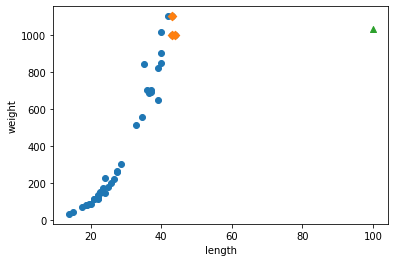

In [22]:
# 한번 더 그래프를 그려볼까 

#100cm 농어의 이웃을 구함 
distances, indexes = knr.kneighbors([[100]])

#훈련 세트의 산점도를 그림 
plt.scatter(train_input, train_target)

#훈련 세트 중에서 이웃 샘플만 다시 그림 
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

#100cm 농어 데이터 
plt.scatter(100, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [23]:
from sklearn.linear_model import LinearRegression
lr=  LinearRegression()

#선형 회귀 모델을 훈련 
lr. fit(train_input, train_target)

#50cm 농어에 대해 예측
print(lr.predict([[50]]))

[1241.83860323]


k-최근접 이웃 회귀를 사용했을 때와 달리 선형회귀는 50cm 농어의 무게를 높게 예측하였음 

하나의 직선을 그리려면 기울기와 절편이 있어야함 
y= ax+b 

x를 농어의 길이, y를 농어의 무게

In [24]:
#LinearRegression 클래스가 이 데이터에 잘 맞는 a,b를 찾았을까?
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


농어의 길이 15에서 50까지 직선으로 그린다. 
직선을 그리려면 (15, 15x39-709)와 (50, 50x39-709) 두 점을 이으면 됨 

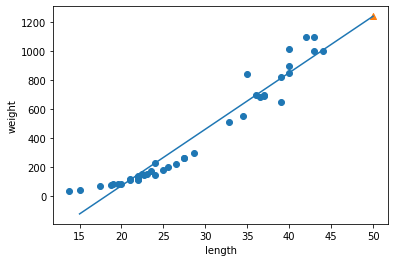

In [25]:
#훈련 세트의 산점도를 그린다 
plt.scatter(train_input, train_target)

#15에서 50까지 1차 방정식 그래프를 그린다 
plt.plot([15,50], [15*lr.coef_+lr.intercept_,50*lr.coef_+lr.intercept_])

#50cm 농어 데이터
plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

직선이 선형 회귀 알고리즘이 이 데이터 셋에서 찾은 최적의 직선이다.

In [26]:
#훈련 세트 
print(lr.score(train_input, train_target))
#테스트 세트
print(lr.score(test_input, test_target))

0.939846333997604
0.8247503123313558


훈련세트와 테스트 세트의 점수가 조금 차이가 난다. 이 모델은 훈련 세트의 점수가 그렇게 높지 않기 때문에 전체적으로 과소적합되어있음
그리고 그래프가 0이하로 떨어지는 것이 그래프가 잘 못된 것임을 발견하였음

따라서 1차가 아닌 2차그래프를 그렸어야 했음
2차 방정식 그래프를 그리려면 길이를 제곱한 항이 훈련 세트에 추가되어야함 

In [27]:
train_poly = np.column_stack((train_input **2, train_input))
test_poly = np.column_stack((test_input **2, test_input))

In [28]:
print(train_poly.shape, test_poly.shape) 

#열이 1개였다가 2개로 추가되었음을 확인할 수 있었음 

(42, 2) (14, 2)


In [29]:
#50cm짜리 농어에 대해 무게를 예측, 훈련세트에서 했던 것처럼 모델에 농어의 길이의 제곱과 원래 길이를 함께 넣어주어야함 
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2, 50]]))

[1573.98423528]


In [30]:
#계수와 절편을 출력하기 

print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.0502107827827


모델은 무게 = 1.01 x 길이^2 - 21.6 x 길이 +116.05 를 학습하였다 

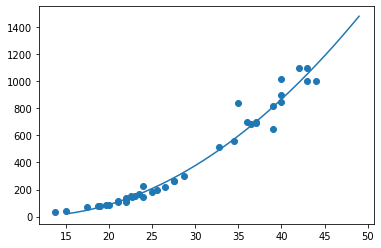

In [31]:
#구간별 직선을 그리기 위해 15에서 49까지 정수 배열을 만든다 
point= np.arange(15, 50)

#훈련 세트의 산점도를 그린다 
plt.scatter(train_input, train_target)

#15에서 49까지 2차 방정식 그래프를 그린다 
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)

In [32]:
#훈련 세트와 테스트 세트의 r2(결정계수)점수를 확인 

print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122


=> 훈련세트와 테스트 세트에 대한 점수가 크게 높아졌음 but 여전히 테스트 세트의 점수가 조금 더 높은 것을 보아 과소적합이 아직 남아있음

03-3 특성공학과 규제

In [33]:
import pandas as pd 

df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [34]:
import numpy as np 
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [35]:
#perch_full과 perch_weight를 훈련 세트와 테스트 세트로 나눔 
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    perch_full, perch_weight, random_state=42
)

In [36]:
from sklearn.preprocessing import PolynomialFeatures

poly= PolynomialFeatures()
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[1. 2. 3. 4. 6. 9.]]


PolynomialFeatures 클래스는 기본적으로 각 특성을 제곱한 항을 추가하고 특성끼리 서로 곱한 항을 추가하였음 

무게 = a x 길이 + b x 높이 + c x 두께 + d x 1
선형 방정식의 절편을 항상 값이 1인 특성과 곱해지는 계수, 특성은 (길이, 높이, 두께, 1)이 됨 

In [37]:
#사이킷런의 선형 모델은 자동으로 절편을 추가하므로 특성을 만들 필요 없음 
#include_bias= False로 지정하여 다시 특성을 변환 

poly= PolynomialFeatures(include_bias=False)
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

#절편을 위한 항이 제거되고 특성의 제곱과 특성끼리 곱한 항만 추가되었음 

[[2. 3. 4. 6. 9.]]


In [38]:
poly= PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly= poly.transform(train_input)
print(train_poly.shape)

(42, 9)


In [39]:
#PolynomialFeatures 클래스는 9개의 특성이 어떻게 만들어졌는지 확인 
#get_feature_names_out() 메서드를 호출하면 9개의 특성이 각각 어떤 입력의 조합으로 만들어졌는지 일려줌 

poly.get_feature_names_out()


array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [40]:
test_poly= poly.transform(test_input)

In [41]:
## 다중 회귀모델 훈련하기

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)

LinearRegression()

In [42]:
print(lr.score(train_poly, train_target))

0.9903183436982124


농어의 길이 뿐만 아니라 높이와 두께를 모두 사용하였고 각 특성을 제곱하거나 서로 곱해서 다항 특성을 더 추가하였음 

특성이 늘어나면 선형회귀 능력은 매우 강하다

In [43]:
#테스트 세트에 대한 설명 
print(lr.score(test_poly, test_target))

0.9714559911594134


테스트 세트에 대한 점수는 높아지지 않았지만 농어의 길이만 사용했을 때, 과소적합 문제는 더이상 나타나지 않았음

In [44]:
#polynomialfeatures에 degree 매개변수를 사용하여 필요한 고차항의 최대 차수를 지정할 수 있음 
#5제곱까지 특성을 만들어 출력 
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_poly= poly.transform(train_input)
test_poly= poly.transform(test_input)
print(train_poly.shape)

(42, 55)


만들어진 특성의 개수가 55개, train_poly배열의 열의 수가 특성의 개수.
이 데이터를 사용해 선형 회귀 모델을 다시 훈련함

In [45]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9999999999991097


In [46]:
print(lr.score(test_poly, test_target))

-144.40579242684848


특성의 개수를 크게 늘리면 선형 모델은 아주 강력해짐, 훈련세트에 대해 거의 완벽하게 학습할 수 있지만 과대적합되므로 테스트 세트에서는 형편없는 점수를 만듦 

In [47]:
from sklearn.preprocessing import StandardScaler 
#StandardScaler 클래스의 객체 ss를 초기화
ss= StandardScaler()
#PolynomialFeatures 클래스로 만든 train_poly를 사용하여 객체를 훈련
ss.fit(train_poly)
#표준 점수로 변환 
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

릿지회귀

In [48]:
from sklearn.linear_model import Ridge 
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

0.9896101671037343


In [49]:
#테스트 세트에 대한 점수를 확인 
print(ridge.score(test_scaled, test_target))

0.9790693977615391


테스트 점수가 많은 특성을 사용했음에도 불구하고 훈련 세트에 너무 과대적합되지 않아 테스트 세트에서도 좋은 성능을 내고 있음 

릿지와 라쏘 모델을 사용할 때 규제의 양을 임의로 조절할 수 있음, 모델 객체를 만들 때 alpha 매개변수로 규제의 강도를 조절함. alpha 값이 크면 규제 강도가 세지므로 계수 값을 더 줄이고 조금 더 과소 적합되도록 유도, 
alpha 값이 작으면 계수를 줄이는 역할이 줄어들고 선형회귀 모델과 유사해지므로 과대적합이 될 가능성이 높음

In [50]:
import matplotlib.pyplot as plt
train_score= []
test_score=[]

In [51]:
#alpha 값을 0.001에서 100까지 10배씩 늘려가면서 릿지회귀모델을 훈련
#훈련세트와 테스트 세트의 점수를 파이썬 리스트에 저장 

alhpa_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alhpa_list:
  #릿지 모델을 만듦 
  ridge = Ridge(alpha=alpha)
  #릿지 모델을 훈련함 
  ridge.fit(train_scaled, train_target)
  #훈련 점수와 테스트 점수를 저장
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))

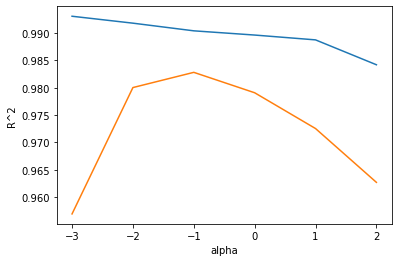

In [52]:
plt.plot(np.log10(alhpa_list), train_score)
plt.plot(np.log10(alhpa_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

파란색은 훈련세트 그래프, 주황색은 테스트 세트 그래프이다. 훈련세트에는 잘 맞고 테스트 세트에는 형편없는 과대적합의 전형적인 모습을 보임. 오른쪽 편은 훈련세트와 테스트세트의 점수가 모두 낮아지는 과소적합으로 가는 모습을 보임

In [53]:
ridge= Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570365
0.9827976465386884


훈련세트와 테스트세트의 점수가 비슷하게 모두 높고 과대적합과 과소적합 사이에서 균형을 맞추고 있다.

라쏘회귀 

In [54]:
from sklearn.linear_model import Lasso
lasso= Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))

0.989789897208096


In [55]:
print(lasso.score(test_scaled, test_target))

0.9800593698421883


라쏘 모델도 alpha 매개변수로 규제의 강도를 조절할  수 있음 

In [56]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 라쏘 모델을 만듭니다
    lasso = Lasso(alpha=alpha, max_iter=10000)
    # 라쏘 모델을 훈련합니다
    lasso.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


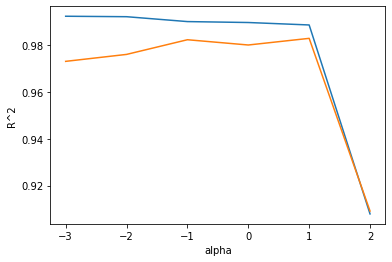

In [57]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

주황색- 테스트 세트 그래프
파란색- 훈련세트 그래프 

왼쪽은 과대적합을 보여주고 있고, 오른쪽으로 갈수록 훈련 세트와 테스트 세트의 점수가 좁혀지고 있음, 가장 오른쪽은 아주 크게 점수가 떨어지는데 이 지점은 과소적합되는 모델

라쏘모델에서 최적의 alpha 값은 1, 즉 10^1=10

In [58]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


모델이 잘 훈련되었음을 알 수 있음, 특성을 많이 사용했지만 릿지와 마찬가지로 라쏘 모델이 과대적합을 잘 억제하고 테스트 세트의 성능을 크게 높였음. 

라쏘모델은 계수 값을 아예 0으로 만들수 있음 
라쏘모델의 계수 coef_ 속성에 저장되어 있음 

In [59]:
print(np.sum(lasso.coef_ ==0))

40


계수 0이 40개가 있음, 55개의 특성을 모델에 주입했었지만 라쏘 모델이 사용한 특성은 15개밖에 되지 않는다. 따라서 이런 특징 때문에 라쏘모델을 유용한 특성을 골라내는 용도로 사용할 수 있음